## **Proyecto 2: Regresión Lineal con Auto MPG - Gian Paolo Robelo 20230117**

## **Descripción del Proyecto**
En este proyecto, implementaremos un modelo de regresión lineal utilizando la librería `scikit-learn`. En lugar de hacer la regresión desde cero, emplearemos las herramientas estándar de aprendizaje automático para predecir la eficiencia de combustible de los autos en función de su potencia (caballos de fuerza).

## **Descripción del Dataset**
El dataset utilizado es **Auto MPG**, que contiene información sobre el rendimiento de combustible de diversos automóviles. Incluye las siguientes variables:
- `mpg` (Millas por galón, eficiencia de combustible) ➝ **Variable dependiente**
- `horsepower` (Caballos de fuerza del motor) ➝ **Variable independiente**

## **Objetivo**
El objetivo es entrenar un modelo de regresión lineal simple para predecir el consumo de combustible de los autos y evaluar su rendimiento con diferentes métricas.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [4]:
df = pd.read_csv("auto-mpg.csv")  
df.head() 

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [6]:
X = df[['horsepower']]  
y = df['mpg']  

df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [7]:
y_pred = model.predict(X_test)


In [9]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)  # Métrica extra (puedes cambiarla por RMSE)

print(f"R^2: {r2}")
print(f"MSE: {mse}")
print(f"MAE: {mae}")


R^2: 0.5659681822256185
MSE: 22.153237123863413
MAE: 3.782512710126959


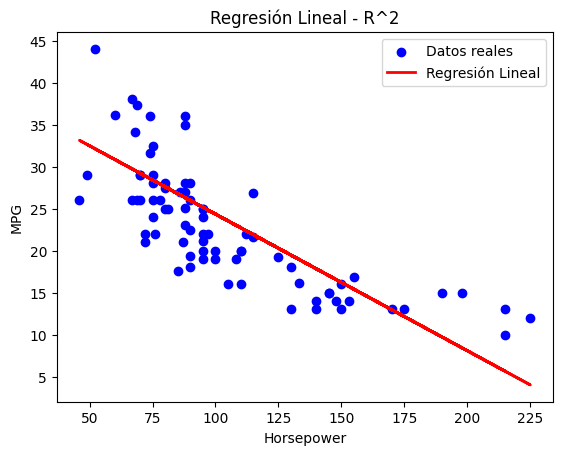

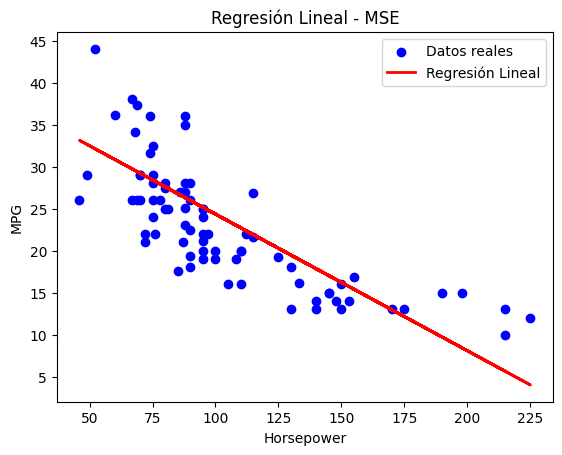

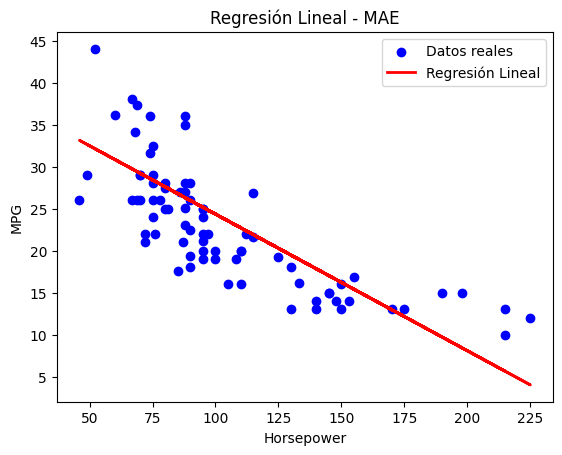

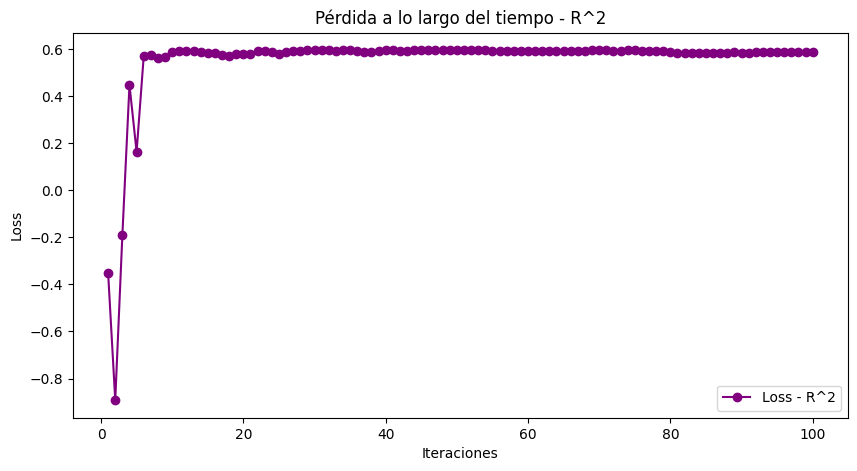

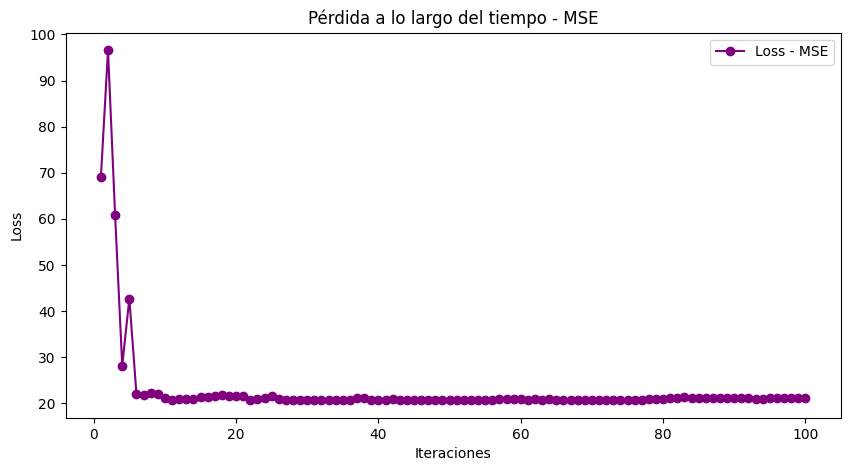

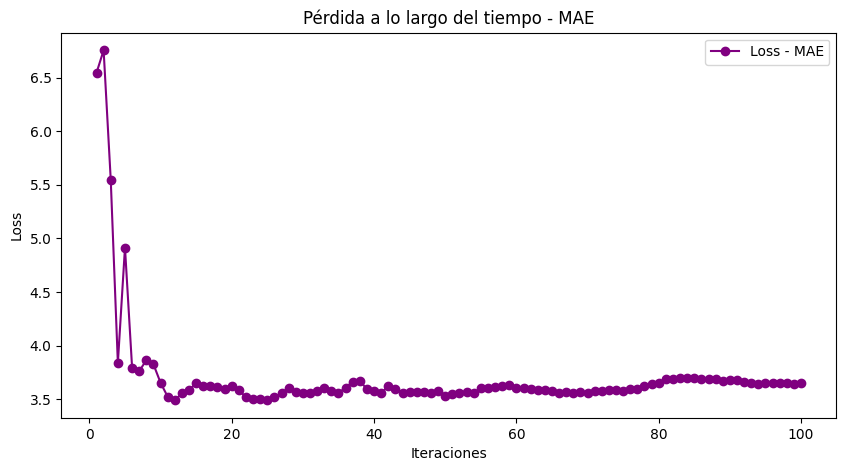

In [10]:
# Graficar la regresión para cada métrica
def plot_regression(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    plt.scatter(X_test, y_test, color='blue', label='Datos reales')
    plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regresión Lineal')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
    plt.title(title)
    plt.show()

# Evaluar para cada métrica y graficar
models = {'R^2': r2_score, 'MSE': mean_squared_error, 'MAE': mean_absolute_error}
for name, metric in models.items():
    model = LinearRegression()
    model.fit(X_train, y_train)
    plot_regression(model, X_test, y_test, f'Regresión Lineal - {name}')

# Gráfica de pérdida sobre iteraciones (Loss over time) separada para cada métrica
for name, metric in models.items():
    loss_values = []
    for i in range(1, 101):  # Simulación de iteraciones
        sample_model = LinearRegression()
        sample_model.fit(X_train[:i], y_train[:i])
        y_sample_pred = sample_model.predict(X_test)
        loss_values.append(metric(y_test, y_sample_pred))
    
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, 101), loss_values, marker='o', linestyle='-', label=f'Loss - {name}', color='purple')
    plt.xlabel('Iteraciones')
    plt.ylabel('Loss')
    plt.title(f'Pérdida a lo largo del tiempo - {name}')
    plt.legend()
    plt.show()
